In [1]:
import sys
import subprocess
import numpy as np
import pandas as pd
import scipy.io as sio

import os

from core import *


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.cluster import normalized_mutual_info_score

import matplotlib.pyplot as plt
from scipy.sparse import hstack


/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:522: FutureWarning: Passing (type, 1) or 

In [2]:
data_folder='~/Bcells/GitHub/Bit/Data/'

In [3]:
table_summary= pd.DataFrame(columns=['Data','sen_short','sen_mid','sen_long','spec_short','spec_mid','spec_long'])
table_a= pd.DataFrame(columns=['clone','table','ig'])


In [4]:
for i in range (1,30):

        table_a=table_a.append({'clone':data_folder+'clone_dataMS4_v'+str(i)+'.csv','table': data_folder+'SimData/sim_dataMS4_v'+str(i)+'.csv' ,'ig': data_folder+'Igblast_res/sampleMS4_o'+str(i)+'_germ-pass.tab' }, ignore_index=True)


In [5]:
for i in range (1,27):
 
        table_a=table_a.append({'clone':data_folder+'clone_dataMS3_v'+str(i)+'.csv','table': data_folder+'SimData/sim_dataMS3_v'+str(i)+'.csv' ,'ig': data_folder+'Igblast_res/sampleMS3_o'+str(i)+'_germ-pass.tab' }, ignore_index=True)

In [6]:
for i in range (1,21):
    table_a=table_a.append({'clone':data_folder+'clone_dataMS2_vv'+str(i)+'.csv','table': data_folder+'SimData/sim_dataMS2_vv'+str(i)+'.csv'  ,'ig': data_folder+'Igblast_res/sampleMS2_'+str(i)+'_db-pass.tab'}, ignore_index=True)

In [30]:
jun_arr=[]
len_arr=[]
for i in range(0,table_a.shape[0]):
    table_ig=pd.read_table(table_a.ig[i])
    table_clone=pd.read_csv(table_a.clone[i])
    table_full=pd.read_csv(table_a.table[i])

    table_short=table_full.SEQUENCE[table_ig.SEQUENCE_ID-1]
    clone_list_short=table_clone.values[table_ig.SEQUENCE_ID-1][:,1]
 
    table_clone_list=np.copy(clone_list_short)
    jun_len_vec=table_ig.JUNCTION_LENGTH.values
    
    len_vec=np.zeros(table_short.shape[0])
    for l in range(0,table_short.shape[0]):
        len_vec[l]=(table_short.values[l].__len__())
    jun_arr=np.append(jun_arr,jun_len_vec)
    len_arr=np.append(len_arr,len_vec)

/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.


In [31]:
bins=np.arange(21,100,3)

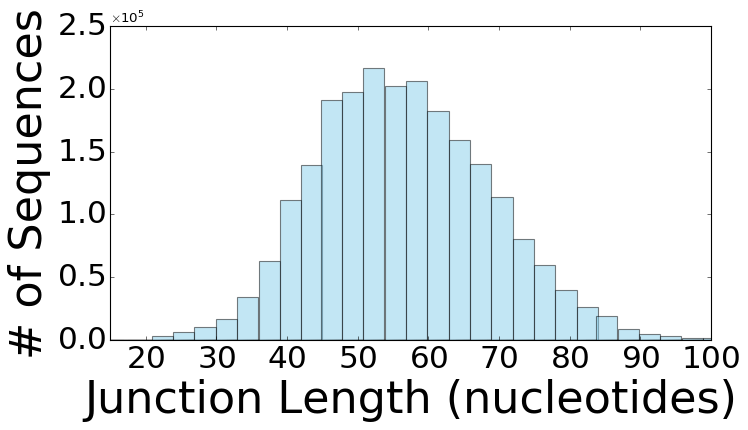

In [32]:
import matplotlib.pyplot as plt
plt.ion()
plt.style.use('classic')
fig, ax = plt.subplots(figsize=(10,6))
plt.hist(jun_arr, color='skyblue',ec='k', bins='auto',alpha=0.5,width=3)  # arguments are passed to np.histogram
plt.rcParams.update({'font.size':28})
plt.xlabel('Junction Length (nucleotides)',fontsize=40)
plt.ylabel('# of Sequences',fontsize=40)
plt.tick_params(labelsize=28)
ax.set_xlim([15,100])
plt.ticklabel_format( axis='both', style='', scilimits=None, useOffset=None, useLocale=None, useMathText=True)
plt.ticklabel_format(style='sci',scilimits=(4,3),axis='y')
plt.tight_layout() 
fig.set_facecolor('white')
plt.savefig('Figs/Junction_len_hist_fin')

In [33]:
len_arr

array([510., 510., 510., ..., 535., 535., 506.])

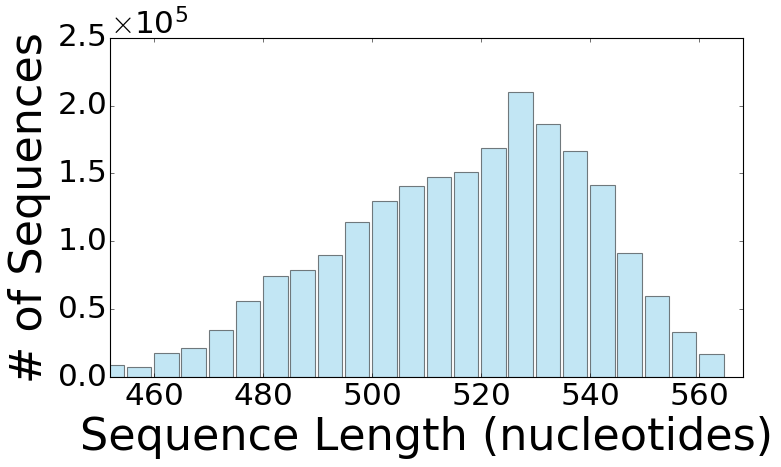

In [34]:
bins=np.arange(450,570,5)
plt.ion()
fig, ax = plt.subplots(figsize=(10,6))
plt.style.use('classic')
plt.hist(len_arr, color='skyblue',ec='k', bins=bins,alpha=0.5,width=4.5)# arguments are passed to np.histogram
plt.xlabel('Sequence Length (nucleotides)',fontsize=40)
#plt.xlabel('$L_S<500$ $500<L_S<520$ $520<L_S$',fontsize=12)
plt.ylabel('# of Sequences',fontsize=40)
ax.set_xlim([452,568])
#ax.set_ylim([2000,52000])
plt.tick_params(labelsize=28)
plt.ticklabel_format( axis='both', style='', scilimits=None, useOffset=None, useLocale=None, useMathText=True)
plt.ticklabel_format(style='sci',scilimits=(4,3),axis='y')
plt.tight_layout() 
fig.set_facecolor('white')
#plt.show()
plt.savefig('Figs/Sequence_len_hist_fin')

In [41]:
clone_size_arr=[]
len_arr=[]
for i in range(0,table_a.shape[0]):
    table_ig=pd.read_table(table_a.ig[i])
    table_clone=pd.read_csv(table_a.clone[i])
    table_full=pd.read_csv(table_a.table[i])

    table_short=table_full.SEQUENCE[table_ig.SEQUENCE_ID-1]
    clone_list_short=table_clone.SEED_SEQUENCE_ID[1:]
    [a,b]=np.unique(clone_list_short, return_counts=True)
    clone_size_arr=np.append(clone_size_arr,b)

/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.


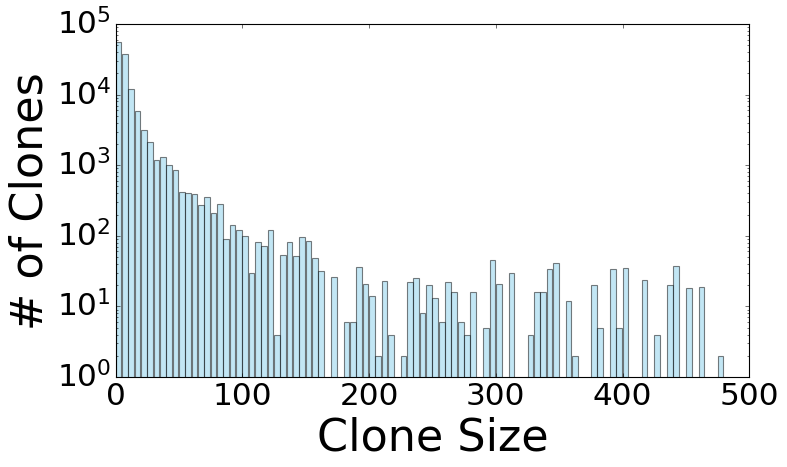

In [42]:
bins=np.arange(0,500,5)
plt.ion()
plt.style.use('classic')
fig, ax = plt.subplots(figsize=(10,6))
ax.hist((clone_size_arr[np.where(clone_size_arr>2)]),color='skyblue',ec='k', bins=bins,alpha=0.5,width=4.5,log='y')  # arguments are passed to np.histogram
#ax.set_xlim([0,200])

plt.xlabel('Clone Size',fontsize=40)
plt.ylabel('# of Clones',fontsize=40)
plt.tick_params(labelsize=28)
fig.set_facecolor('white')
plt.tight_layout() 
plt.savefig('Figs/Clone_size_fin')

In [14]:

def truncate_sequence_v(table,W_l=200):
    import pandas as pd
    table_last= pd.DataFrame(columns=['end'])
    sequencesplit=[]
    M=table.shape[0]
    
   # W_l=200
    E_l=0
    for i in range (0,M):
        s_l=table[i].__len__()
        table_last = table_last.append({'end': table[i][s_l-W_l:s_l-E_l]}, ignore_index=True)
    return table_last

In [19]:
table_multiple=pd.read_csv(data_folder+'RealData/MS2_repertoir.csv')

In [20]:
i=0
table_clone=pd.read_csv(table_a.clone[i])
table=pd.read_csv(table_a.table[i])
clone_list=table_clone.SEED_SEQUENCE_ID[:]
M=37000
table_short=table.SEQUENCE[:M]
clone_list_short=clone_list[:M]
table_clone_list=np.copy(clone_list_short.values)



table_neg=table_multiple
table_short_neg=table_neg.SEQUENCE_INPUT[:40000]

frames = [table_short,table_short_neg]
concat_table = pd.concat(frames,ignore_index=True)
table_last=truncate_sequence_v(concat_table,W_l=250)

vectorizer = TfidfVectorizer(min_df=1, analyzer=ngrams,use_idf=True)
tf_idf_matrix_full= vectorizer.fit_transform(table_last.end)

matches_fast= awesome_cossim_top(tf_idf_matrix_full[:M], tf_idf_matrix_full[:M].transpose(), 800, 0.1)
dist2nearestcosine=compute_dist2nearest(matches_fast)
matches_neg= awesome_cossim_top(tf_idf_matrix_full[:M], tf_idf_matrix_full[M:].transpose(), 800, 0.1)
dist2nearestcosine_neg=compute_dist2nearest(matches_neg)


In [21]:
vectorizer = TfidfVectorizer(min_df=1, analyzer=ngrams,use_idf=True)
tf_idf_matrix_full_no_idf= vectorizer.fit_transform(table_short)
matches_fast_noidf= awesome_cossim_top(tf_idf_matrix_full_no_idf, tf_idf_matrix_full_no_idf.transpose(), 800, 0.1)
dist2nearestcosine_noidf=compute_dist2nearest(matches_fast_noidf)

dist2nearesthist=np.histogram(dist2nearestcosine,bins='auto')
indice_min=np.argmin(dist2nearesthist[0][np.where(dist2nearesthist[1]<0.15)])
thresh_cosine_s=dist2nearesthist[1][indice_min]
clusters_cosine_full_s=cluster_from_matches(matches_fast,thresh_cosine_s)
labels_list_short,cloned_list_full_short=clone_inference(table_clone_list,clusters_cosine_full_s)

In [22]:
bins=np.arange(0,1,0.01)
dist2nearesthist_clones=np.histogram(dist2nearestcosine[labels_list_short[:M]==1],bins=bins)
dist2nearesthist_sing=np.histogram(dist2nearestcosine[labels_list_short[:M]==0],bins=bins)
dist2nearesthist_neg=np.histogram(dist2nearestcosine_neg[:10000],bins=bins)

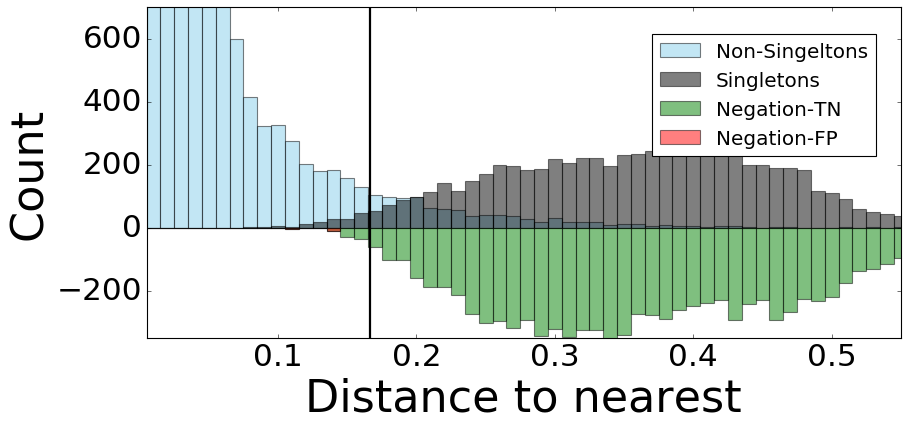

In [23]:

plt.ion()
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(dist2nearesthist_clones[1][1:],dist2nearesthist_clones[0], color='skyblue', alpha=0.5, width=0.01,ec='k',label='Non-Singeltons')  # arguments are passed to np.histogram
ax.bar(dist2nearesthist_clones[1][1:],dist2nearesthist_sing[0], color='k', alpha=0.5, width=0.01,ec='k',label='Singletons') 
ax.bar(dist2nearesthist_clones[1][1:],-dist2nearesthist_neg[0], color='g', alpha=0.5, width=0.01,ec='k',label='Negation-TN')
ax.bar(dist2nearesthist_clones[1][1:][np.where(dist2nearesthist_clones[1][1:]<thresh_cosine_s)],-dist2nearesthist_neg[0][np.where(dist2nearesthist_clones[1][1:]<thresh_cosine_s)], color='r', alpha=0.5, width=0.01,ec='k',label='Negation-FP') 
ax.set_xlim([0.005, 0.55])
ax.set_ylim([-350,700])
plt.ylabel('Count')
plt.xlabel('Distance to nearest')
thresh_cosine_s=np.percentile(dist2nearestcosine_neg,1.5)
ax.vlines(x=thresh_cosine_s, ymin=-420, ymax=20000, linewidth=2, color='k')
ax.xaxis.label.set_fontsize(40)
ax.yaxis.label.set_fontsize(40)
plt.tick_params(labelsize=28)
plt.rcParams.update({'font.size':28})
plt.legend(fontsize=18)
fig.set_facecolor('white')
plt.tight_layout()
plt.legend(fontsize=18,loc='lower right',bbox_to_anchor=(0.98, 0.52))


In [43]:
jun_loc=[]
for i in range(0,table_a.shape[0]):
    table_ig=pd.read_table(table_a.ig[i])
    table_clone=pd.read_csv(table_a.clone[i])
    table_full=pd.read_csv(table_a.table[i])
    for j in range(table_ig.shape[0]):
        curr_loc=table_ig.SEQUENCE_INPUT[j].__len__()-table_ig.SEQUENCE_INPUT[j].find(table_ig.JUNCTION[j])
        jun_loc=np.append(jun_loc,curr_loc)

/home/ofir/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
bins=np.arange(50,160,3)
dist2nearesthistA=np.histogram(jun_loc,bins=bins,density=True)

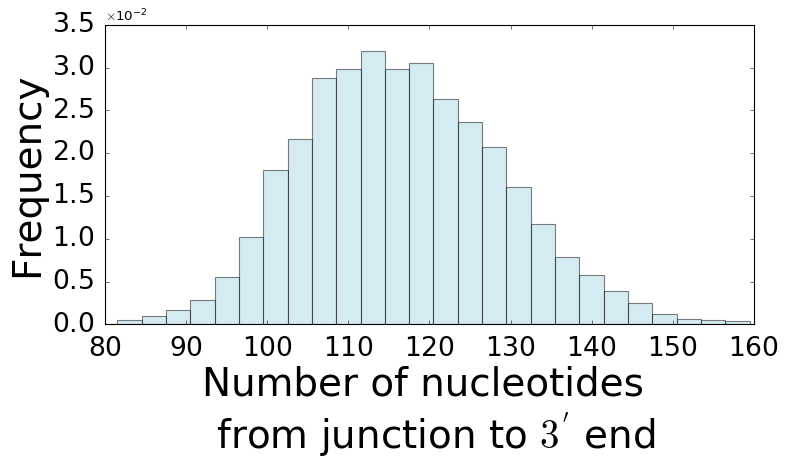

In [48]:
plt.ion()
fig, ax = plt.subplots(figsize=(10,6))
#bins=np.arange(0, 160, 1)
ax.bar(dist2nearesthistA[1][1:],dist2nearesthistA[0], color='lightblue',ec='k', alpha=0.5,width=3)  # arguments are passed to np.histogram

ax.set_xlim([80, 160])

#plt.yscale('log')
plt.ylabel('Frequency')
plt.xlabel('Number of nucleotides \n from junction to $3^{\'}$ end')

plt.ticklabel_format( axis='both', style='', scilimits=None, useOffset=None, useLocale=None, useMathText=True)
plt.ticklabel_format(style='sci',scilimits=(4,3),axis='y')
ax.xaxis.label.set_fontsize(35)
ax.yaxis.label.set_fontsize(35)
ax.tick_params(labelsize=24,pad=10)
fig.set_facecolor('white')
plt.tight_layout()
plt.savefig('Figs/jun_len_loc_fin')